In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.pipeline import make_pipeline, make_union
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
data = pd.read_csv('final_data.csv')
data.isna().sum().sum()

0

In [3]:
y_col = ['BulkModulus (GPa)', 'D_Bulk (GPa)']
# Split data into features (X) and target (Y)
X = data.drop(columns=y_col)
Y = data[y_col]

print(X.isnull().sum().sum())  # Check for missing values in the dataset
print(Y.isnull().sum().sum())  # Check for missing values in the dataset
Y

0
0


,BulkModulus (GPa),D_Bulk (GPa)
0,92.000000,11.313708
1,64.307692,28.217247
2,40.000000,48.989795
3,75.000000,43.301270
4,58.750000,23.815699
...,...,...
1098,137.200000,37.833319
1099,119.714286,42.270267
1100,144.000000,33.585711
1101,153.473684,47.015528


In [4]:
# Split data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(X_train.isnull().sum().sum())
Y_test.shape

0


(221, 2)

In [5]:
# Scaling numerical features
cols = np.array(X_train.columns)

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=cols)
X_test = pd.DataFrame(scaler.transform(X_test), columns=cols)

print(X_train.isnull().sum().sum())
print(X_test.isnull().sum().sum())

print(X_test.isnull().sum().sum())
print(X_train.isnull().sum().sum())

Y_train.head()

0
0
0
0


,BulkModulus (GPa),D_Bulk (GPa)
1006,110.638298,69.905841
256,73.800000,68.134866
290,109.200000,84.489999
292,164.000000,30.463092
2,40.000000,48.989795


In [6]:
# Initialize and train your neural network model
nn_model = MLPRegressor(activation='logistic', alpha=0.01, batch_size = 2, max_iter=8000, random_state=42)
nn_model.fit(X_train, Y_train)

# Evaluate the model
train_accuracy = nn_model.score(X_train, Y_train)
test_accuracy = nn_model.score(X_test, Y_test)

print("Training accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)

Y_pred_nn = nn_model.predict(X_test)

test_mse = mean_squared_error(Y_test, Y_pred_nn)
test_mae = mean_absolute_error(Y_test, Y_pred_nn)
print("NN MSE: %.2f" %(test_mse))
print("NN MAE: %.2f" %(test_mae))
print("NN RMSE: %.2f" %(np.sqrt(test_mse)))

Training accuracy: 0.9968252457893827
Test accuracy: 0.8803029860766037
NN MSE: 72.16
NN MAE: 4.12
NN RMSE: 8.49


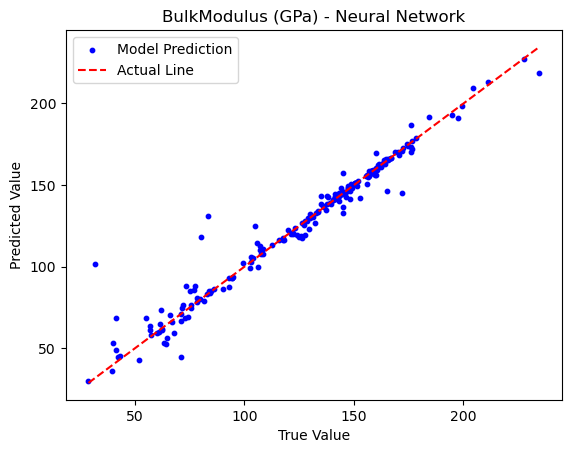

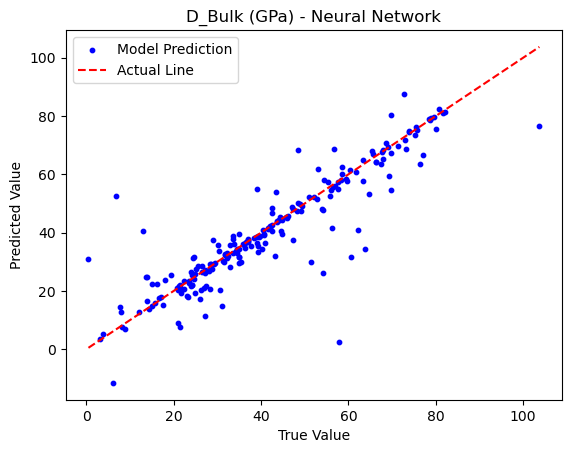

In [7]:
plt.scatter(Y_test['BulkModulus (GPa)'], [a[0] for a in Y_pred_nn], s=10, color='blue', label='Model Prediction')
plt.plot([min(Y_test['BulkModulus (GPa)']), max(Y_test['BulkModulus (GPa)'])], [min(Y_test['BulkModulus (GPa)']), max(Y_test['BulkModulus (GPa)'])], color='red', linestyle='--', label='Actual Line')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title('BulkModulus (GPa) - Neural Network')
plt.legend()
plt.show()

plt.scatter(Y_test['D_Bulk (GPa)'], [a[1] for a in Y_pred_nn], s=10, color='blue', label='Model Prediction')
plt.plot([min(Y_test['D_Bulk (GPa)']), max(Y_test['D_Bulk (GPa)'])], [min(Y_test['D_Bulk (GPa)']), max(Y_test['D_Bulk (GPa)'])], color='red', linestyle='--', label = 'Actual Line')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title('D_Bulk (GPa) - Neural Network')
plt.legend()
plt.show()

In [8]:
kn_model = KNeighborsRegressor(leaf_size=1, metric='minkowski', algorithm='auto', n_neighbors=5, p=1, weights='uniform')
kn_model.fit(X_train, Y_train)

# Evaluate the model
train_accuracy = kn_model.score(X_train, Y_train)
test_accuracy = kn_model.score(X_test, Y_test)

print("Training accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)

Y_pred_kn = kn_model.predict(X_test)

test_mse = mean_squared_error(Y_test, Y_pred_kn)
test_mae = mean_absolute_error(Y_test, Y_pred_kn)
print("KNN MSE: %.2f" %(test_mse))
print("KNN MAE: %.2f" %(test_mae))
print("KNN RMSE: %.2f" %(np.sqrt(test_mse)))

Training accuracy: 0.8822738983243156
Test accuracy: 0.8409719748900994
KNN MSE: 115.18
KNN MAE: 6.69
KNN RMSE: 10.73


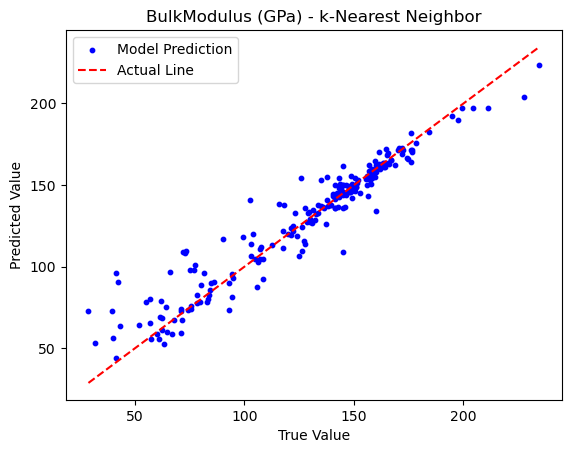

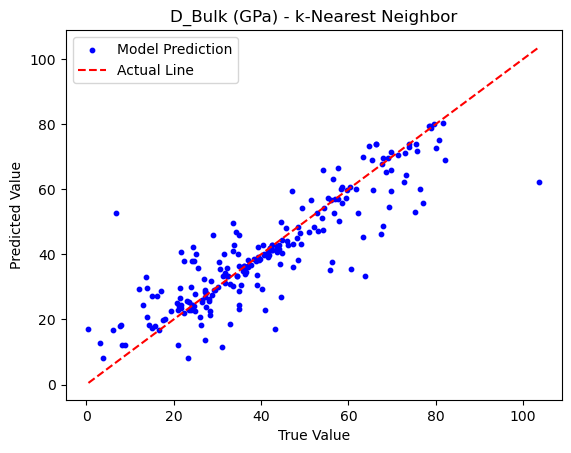

In [9]:
plt.scatter(Y_test['BulkModulus (GPa)'], [a[0] for a in Y_pred_kn], s=10, color='blue', label='Model Prediction')
plt.plot([min(Y_test['BulkModulus (GPa)']), max(Y_test['BulkModulus (GPa)'])], [min(Y_test['BulkModulus (GPa)']), max(Y_test['BulkModulus (GPa)'])], color='red', linestyle='--', label='Actual Line')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title('BulkModulus (GPa) - k-Nearest Neighbor')
plt.legend()
plt.show()

plt.scatter(Y_test['D_Bulk (GPa)'], [a[1] for a in Y_pred_kn], s=10, color='blue', label='Model Prediction')
plt.plot([min(Y_test['D_Bulk (GPa)']), max(Y_test['D_Bulk (GPa)'])], [min(Y_test['D_Bulk (GPa)']), max(Y_test['D_Bulk (GPa)'])], color='red', linestyle='--', label = 'Actual Line')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title('D_Bulk (GPa) - k-Nearest Neighbor')
plt.legend()
plt.show()

In [10]:
lr_model = LinearRegression()
lr_model.fit(X_train, Y_train)

# Evaluate the model
train_accuracy = lr_model.score(X_train, Y_train)
test_accuracy = lr_model.score(X_test, Y_test)

print("Training accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)

Y_pred_lr = lr_model.predict(X_test)

test_mse = mean_squared_error(Y_test, Y_pred_lr)
test_mae = mean_absolute_error(Y_test, Y_pred_lr)
print("LR MSE: %.2f" %(test_mse))
print("LR MAE: %.2f" %(test_mae))
print("LR RMSE: %.2f" %(np.sqrt(test_mse)))

Training accuracy: 0.8601722676598844
Test accuracy: -4.630042052815064e+24
LR MSE: 3443294396944206087405436928.00
LR MAE: 3909021299597.11
LR RMSE: 58679590974581.66


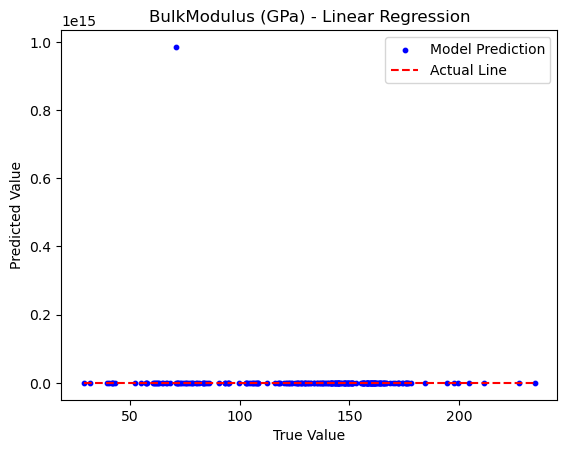

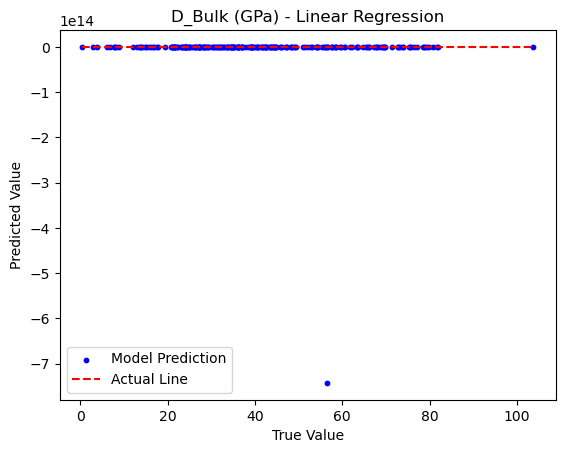

In [11]:
plt.scatter(Y_test['BulkModulus (GPa)'], [a[0] for a in Y_pred_lr], s=10, color='blue', label='Model Prediction')
plt.plot([min(Y_test['BulkModulus (GPa)']), max(Y_test['BulkModulus (GPa)'])], [min(Y_test['BulkModulus (GPa)']), max(Y_test['BulkModulus (GPa)'])], color='red', linestyle='--', label='Actual Line')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title('BulkModulus (GPa) - Linear Regression')
plt.legend()
plt.show()

plt.scatter(Y_test['D_Bulk (GPa)'], [a[1] for a in Y_pred_lr], s=10, color='blue', label='Model Prediction')
plt.plot([min(Y_test['D_Bulk (GPa)']), max(Y_test['D_Bulk (GPa)'])], [min(Y_test['D_Bulk (GPa)']), max(Y_test['D_Bulk (GPa)'])], color='red', linestyle='--', label = 'Actual Line')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title('D_Bulk (GPa) - Linear Regression')
plt.legend()
plt.show()